In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 


/home/shiyanlou/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [7]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)


In [8]:
import warnings 

def ignore_warn(*afs, **kwargs):
    pass

warnings.warn = ignore_warn 


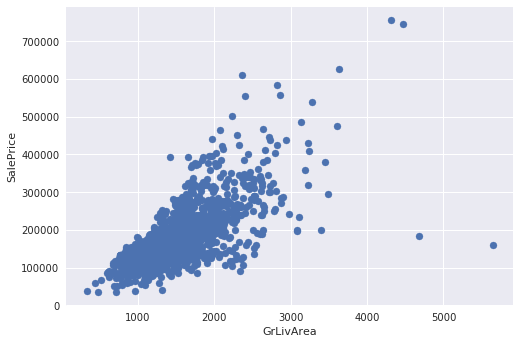

In [9]:
sns.set(style='darkgrid')
fig = plt.figure()
ax = plt.scatter(train['GrLivArea'], train['SalePrice'])

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()


In [10]:
#delete data 
train = train.drop(train[train['GrLivArea'] > 4000].index)


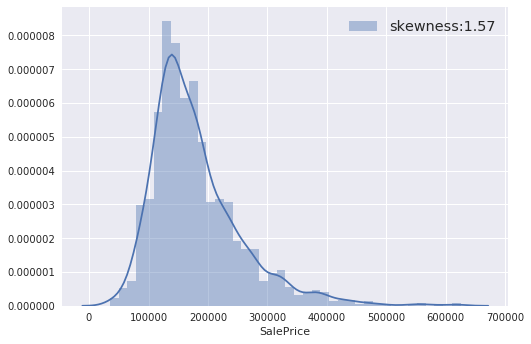

In [14]:
g = sns.distplot(train['SalePrice'], kde=True, label='skewness:%.2f'%train['SalePrice'].skew())
plt.legend(loc='best', fontsize='large')
g.set(xlabel='SalePrice')
plt.show()


In [17]:
train['SalePrice'] = np.log(train['SalePrice'])
train['SalePrice'].skew()

0.065448820316466455

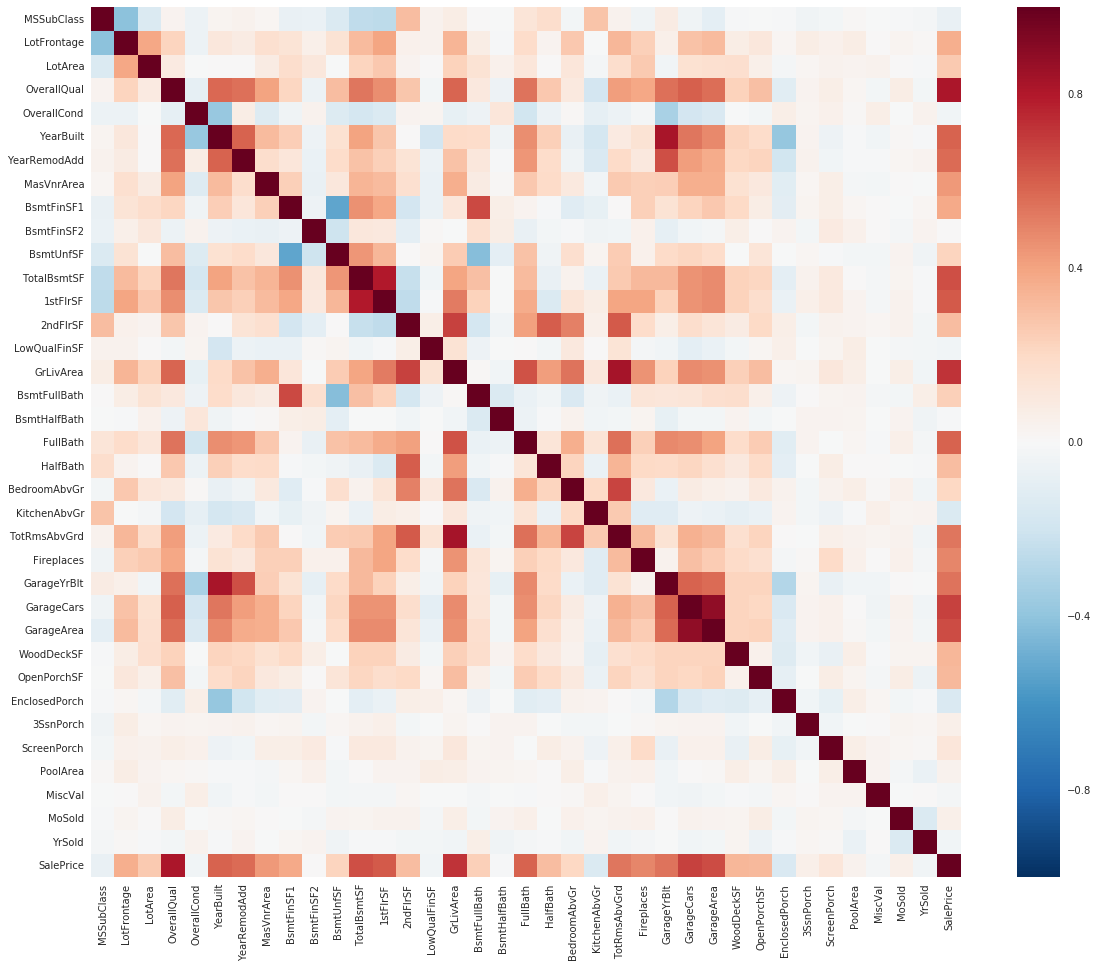

In [20]:
plt.subplots(figsize=(20,16))
sns.heatmap(train.corr(), square=True)
plt.show()

In [21]:
data = pd.concat([train, test], axis=0, ignore_index=True)


In [22]:
def null_count(data):
    null_data = data.isnull().sum()
    null_data = null_data.drop(null_data[null_data == 0].index).sort_values(
                ascending=False)
    return null_data

null_count(data)

PoolQC          2907
MiscFeature     2810
Alley           2717
Fence           2345
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
GarageArea         1
dtype: int64

In [23]:
a = 0
null_set = data[data['BsmtCond'].isnull()]['TotalBsmtSF']
for i in null_set:
    if i != 0:
            a += 1
print(a)


4


In [25]:
No_inplace = ['Alley', 'FireplaceQu', 'Fence']
for feature in No_inplace:
    data[feature].fillna('U', inplace=True)
    

In [31]:
def sp_null_index(data, featrue, judge_feature, judge_value):
    null_index = data[data[featrue].isnull()].index
    sp_index = [i for i in null_index if data[judge_feature][i] != judge_value]
    return sp_index

def fill_null(data, featrues, judge_feature, judge_value, replace_value):
    for feature in features:
        sp_index = sp_null_index(data, feature, judge_feature, judge_value)
        data[feature].fillna(replace_value, inplace=True)
        
        for i in sp_index:
                data[feature].iloc[i] = data[feature].mode()[0]
    return data

zero_replace = ['BsmtHalfBath', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFinSF2', 'BsmtFinSF1']

for feature in zero_replace:
    data[feature].fillna(0.0, inplace=True)
    
features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

data = fill_null(data, features, 'TotalBsmtSF', 0.0, 'U')

data = fill_null(data, ['PoolQC'], 'PoolArea', 0, 'U')


In [32]:
data = fill_null(data, ['PoolQC'], 'PoolArea', 0, 'U')

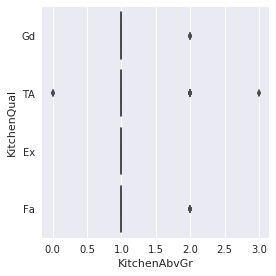

In [33]:
g = sns.factorplot(x='KitchenAbvGr', y='KitchenQual', data=data,
                      kind='box')

data[data['KitchenQual'].isnull()]['KitchenAbvGr']
plt.show()


In [34]:
data['Functional'].fillna('Typ', inplace=True)

In [37]:
data[data['MasVnrType'].isnull()]['MasVnrArea']

234       NaN
528       NaN
649       NaN
934       NaN
971       NaN
975       NaN
1240      NaN
1275      NaN
1687      NaN
1702      NaN
1878      NaN
1988      NaN
2000      NaN
2037      NaN
2307      NaN
2321      NaN
2336      NaN
2345      NaN
2364      NaN
2588      NaN
2606    198.0
2653      NaN
2682      NaN
2858      NaN
Name: MasVnrArea, dtype: float64